<a href="https://colab.research.google.com/github/Vivian-N0826/Predictive-Analytics-of-Waste-Generation-and-Charging-in-Hong-Kong/blob/main/Hongkong_Waste_charging_Policy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


## 导入数据

In [ ]:
# 加载数据
df = pd.read_csv('Hong Kong Waste Charging Policy Survey.csv',encoding='gb18030')

print('Basic info ：')
df.info()

# 查看数据集行数和列数
rows, columns = df.shape

if rows < 100 and columns < 20:
    # 短表数据（行数少于100且列数少于20）查看全量数据信息
    print('All the content information of the data：')
    print(df.to_csv(sep='\t', na_rep='nan'))
else:
    # 长表数据查看数据前几行信息
    print('the first few lines of the data：')
    print(df.head().to_csv(sep='\t', na_rep='nan'))

# 统计各列缺失值数量
missing_values = df.isnull().sum()
print("\n Missing values：")
print(missing_values)

Basic info ：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 22 columns):
 #   Column                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                           --------------  ----- 
 0   Unnamed: 0                                                                                                                                                                                                       102 non-null    object
 1   (1/5) 您對這項政策的支持程度是？
To what extent do you support this policy?                                                                                                        

In [ ]:
print(df.columns)

Index(['Unnamed: 0',
       '(1/5) 您對這項政策的支持程度是？\nTo what extent do you support this policy?',
       '(2/5) 根據『污染者自付』原則，您認為『按垃圾量收費』是否能公平反映不同家庭對環境的負擔？\nAccording to the 'polluter pays' principle, do you think 'charging by the amount of garbage' can fairly reflect the environmental burden of different families?',
       '(3/5) 您認為政府在制定垃圾收費政策時，是否充分考慮了不同階層市民的意見？\n\nDo you think the government has fully considered the opinions of citizens from different social classes when formulating the garbage charging policy?',
       '(4/5) 您認為垃圾收費政策對於減少垃圾總量有多大幫助？\n\nHow helpful do you think the waste charging policy will be in reducing total waste volume?',
       '(5/5) 您認為香港目前的廢物管理問題有多嚴重？\nHow severe do you think Hong Kong's current waste management issues are?',
       '(1/4) 您家中平均每日丟棄多少袋垃圾？（標準：寬：31cm ， 高：53cm）\nOn average, how many bags of waste does your household dispose of daily? (Standard: Width: 31 cm, height: 53 cm)',
       '(2/4)您在过去一周内进行垃圾分类回收的频率是？\n（包括纸类、塑料、金属、玻璃等可回收物）\nHow frequently d

# 数据处理
## 重命名列名

In [ ]:
df = df.rename(columns={
    "(1/5) 您對這項政策的支持程度是？\nTo what extent do you support this policy?": "PolicySupportLevel",
    "(2/5) 根據『污染者自付』原則，您認為『按垃圾量收費』是否能公平反映不同家庭對環境的負擔？\nAccording to the 'polluter pays' principle, do you think 'charging by the amount of garbage' can fairly reflect the environmental burden of different families?": "FairnessPerception",
    "(3/5) 您認為政府在制定垃圾收費政策時，是否充分考慮了不同階層市民的意見？\n\nDo you think the government has fully considered the opinions of citizens from different social classes when formulating the garbage charging policy?": "EffectivenessPerception",
    "(4/5) 您認為垃圾收費政策對於減少垃圾總量有多大幫助？\n\nHow helpful do you think the waste charging policy will be in reducing total waste volume?": "RecyclingEffectPerception",
    "(5/5) 您認為香港目前的廢物管理問題有多嚴重？\nHow severe do you think Hong Kong's current waste management issues are?": "CurrentSeverity",
    "(1/4) 您家中平均每日丟棄多少袋垃圾？（標準：寬：31cm ， 高：53cm）\nOn average, how many bags of waste does your household dispose of daily? (Standard: Width: 31 cm, height: 53 cm)": "DailyWasteBags",
    "(2/4)您在过去一周内进行垃圾分类回收的频率是？\n（包括纸类、塑料、金属、玻璃等可回收物）\nHow frequently did you sort and recycle waste in the past week?\n(including paper, plastic, metal, glass, etc.)":"RecyclingFrequencyLastWeek",
    "(3/4)您過往进行垃圾回收时，通常需要花费多少时间和精力？\n（包括分类、清洁、投递等环节）\nHow much time and effort has it typically taken you to recycle in the past? (including sorting, cleaning, delivery, etc.)":"RecyclingEffort",
    "(4/4)您是否在居住地附近見過廚餘垃圾桶？\nHave you seen food waste recycling bins near your residence?":"SeenFoodWasteBin",
    "您是否使用過廚餘垃圾桶？\nHave you used the food waste recycling bins?":"UsedFoodWasteBin",
    "(1/3)香港三個填埋場中，預計哪一個最早達到飽和？\nWhich of Hong Kong's three landfills is expected to reach saturation at the earliest? ":"ExpectedEarliestSaturationLandfill",
    "(2/3) 以下哪項物品不可回收？\nWhich of the following items is NOT recyclable?":"NonRecyclableItem",
    "(3/3) 您估計香港2023年的回收率是多少？\nWhat do you estimate Hong Kong’s recycling rate was in 2023?":"EstimatedRecyclingRate2023",
    "根據上述2條信息，請您再次評估對垃圾收費政策的支持程度：\nBased on the above two pieces of information, please re-evaluate the degree of support for the garbage charging policy:":"PolicySupportLevel2",
    "(1/6) 您是否是香港永居居民？\nAre you a Hong Kong  permanent resident  ?":"IsPermanentResident",
    "(2/6) 您的最高教育程度是？\nWhat is your highest education level?":"HighestEducationLevel",
    "(3/6)   您和多少人住在一起？\nHow many people do you live with?":"HouseholdSize",
    "您居住在香港哪個區？ / Which district in Hong Kong do you live in?":"HongKongDistrict",
    "(4/6) 您居住的房屋類型是？\nWhat type of housing do you live in?":"HousingType",
    "(5/6) 您的年齡區間是？\nWhat is your age range?":"AgeRange",
    "(6/6) 您的家庭月收入區間是？\nWhat is your household monthly income range?":"HouseholdMonthlyIncomeRange"
})

In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'PolicySupportLevel', 'FairnessPerception',
       'EffectivenessPerception', 'RecyclingEffectPerception',
       'CurrentSeverity', 'DailyWasteBags', 'RecyclingFrequencyLastWeek',
       'RecyclingEffort', 'SeenFoodWasteBin', 'UsedFoodWasteBin',
       'ExpectedEarliestSaturationLandfill', 'NonRecyclableItem',
       'EstimatedRecyclingRate2023', 'PolicySupportLevel2',
       'IsPermanentResident', 'HighestEducationLevel', 'HouseholdSize',
       'HongKongDistrict', 'HousingType', 'AgeRange',
       'HouseholdMonthlyIncomeRange'],
      dtype='object')


In [ ]:
# 查看数据集行数和列数
rows, columns = df.shape

if rows < 100 and columns < 20:
    # 短表数据（行数少于100且列数少于20）查看全量数据信息
    print('数据全部内容信息：')
    print(df.to_csv(sep='\t', na_rep='nan'))
else:
    # 长表数据查看数据前几行信息
    print('数据前几行内容信息：')
    print(df.head().to_csv(sep='\t', na_rep='nan'))

数据前几行内容信息：
	Unnamed: 0	PolicySupportLevel	FairnessPerception	EffectivenessPerception	RecyclingEffectPerception	CurrentSeverity	DailyWasteBags	RecyclingFrequencyLastWeek	RecyclingEffort	SeenFoodWasteBin	UsedFoodWasteBin	ExpectedEarliestSaturationLandfill	NonRecyclableItem	EstimatedRecyclingRate2023	PolicySupportLevel2	IsPermanentResident	HighestEducationLevel	HouseholdSize	HongKongDistrict	HousingType	AgeRange	HouseholdMonthlyIncomeRange
0	2025/04/12 10:43:37 上午 GMT+8	強烈反對 / Strongly oppose	非常不公平 / Very unfair	完全未考慮/ Not considered at all	完全沒幫助 / Not helpful at all	中等嚴重 / Moderately severe	少於1袋 / Less than 1 bag	從未回收 / Never recycled	從未回收 /Never recycled	否 / No	nan	不清楚/ don’t know	鏡子 / Mirrors	<20%	強烈反對 / Strongly oppose	否 / No	碩士及以上 / Master’s or above	0	深水埗區 / Sham Shui Po	其他 / Other	25-34歲 / 25-34	15,001-30,000港元
1	2025/04/12 11:08:56 上午 GMT+8	強烈支持 / Strongly support	非常公平 / Very fair	非常充分 / Considered very fully	非常有幫助 / Very helpful	不太嚴重 / Slightly severe	正好1袋 / Exactly 1 bag	1-2次 / 

## 分类变量转数值变量

In [ ]:
# 支持程度映射
support_mapping = {
    '強烈反對 / Strongly oppose': 1,
    '反對 / Oppose': 2,
    '中立 / Neutral': 3,
    '支持 / Support': 4,
    '強烈支持 / Strongly support': 5
}
df['support_info'] = df['PolicySupportLevel'].map(support_mapping)

# 信息提供后支持程度
df['support_after_info'] = df['PolicySupportLevel2'].map(support_mapping)

In [ ]:
from scipy import stats

# 进行Wilcoxon符号秩检验
statistic, p_value = stats.wilcoxon(
    df['support_info'],
    df['support_after_info'],
    alternative='two-sided'  # 双侧检验：假设差异不为零
)

# 输出结果
print(f"Wilcoxon检验统计量: {statistic:.4f}")
print(f"p值: {p_value:.4f}")

# 判断显著性（以α=0.05为例）
alpha = 0.05
if p_value < alpha:
    print(f"在α={alpha}水平下，拒绝原假设，两组数据存在显著差异。")
else:
    print(f"在α={alpha}水平下，不拒绝原假设，两组数据无显著差异。")

Wilcoxon检验统计量: 195.5000
p值: 0.0019
在α=0.05水平下，拒绝原假设，两组数据存在显著差异。


/tmp/ipython-input-8-1803956000.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='support_info',


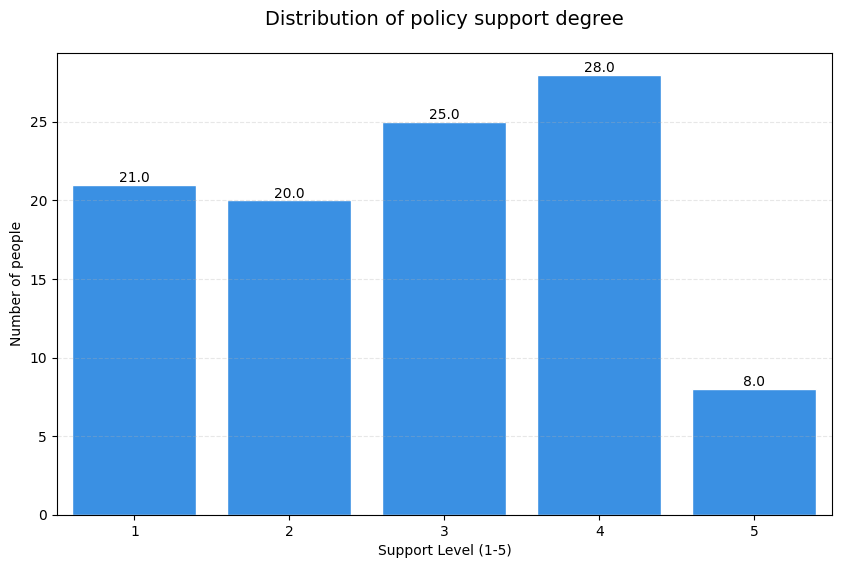

In [ ]:
# 设置环保主题颜色
eco_colors = {
    'main': '#1E90FF',  # 清水蓝
    'secondary': '#3CB371',  # 环保绿
    'highlight': '#FF4500',  # 警示橙红
    'background': '#F5F5F5'
}

plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x='support_info',
                  palette=[eco_colors['main']]*5,
                  edgecolor='white')
plt.title('Distribution of policy support degree', fontsize=14, pad=20)
plt.xlabel('Support Level (1-5)')
plt.ylabel('Number of people')

# 添加数据标签
for p in ax.patches:
    ax.annotate(f"{p.get_height()}",
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center', va='center',
                xytext=(0,5), textcoords='offset points')

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

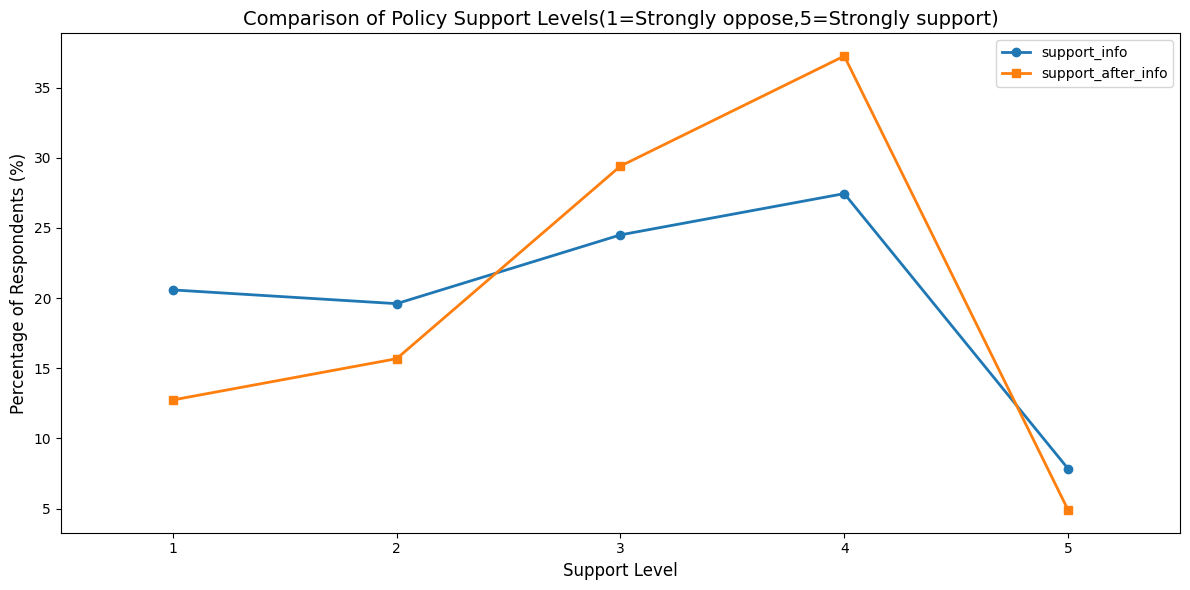

In [ ]:
# 统计两个支持水平的分布
support_level_counts = df['support_info'].value_counts(normalize=True).sort_index()
support_level2_counts = df['support_after_info'].value_counts(normalize=True).sort_index()


# 创建折线图
plt.figure(figsize=(12, 6))
plt.plot(support_level_counts.index, support_level_counts.values*100,
         marker='o', label='support_info', linewidth=2)
plt.plot(support_level2_counts.index, support_level2_counts.values*100,
         marker='s', label='support_after_info', linewidth=2)

# 添加图表元素
plt.title('Comparison of Policy Support Levels(1=Strongly oppose,5=Strongly support)', fontsize=14)
plt.xlabel('Support Level', fontsize=12)
plt.ylabel('Percentage of Respondents (%)', fontsize=12)
plt.xticks(rotation=0)
plt.xlim(0.5, len(support_mapping)+0.5)  # 设置边界
plt.legend()


# 显示图表
plt.tight_layout()
plt.show()

In [ ]:
# 政策公平性认知 (1-5量表)
fairness_mapping = {
    '非常不公平 / Very unfair': 1,
    '不公平 / Unfair': 2,
    '中立 / Neutral': 3,
    '公平 / Fair': 4,
    '非常公平 / Very fair': 5
}
df['fairness'] = df['FairnessPerception'].map(fairness_mapping)

fairness       1   2   3   4  5
support_info                   
1             14   4   1   2  0
2              2  10   6   2  0
3              0   3  12   9  1
4              0   2   7  19  0
5              0   0   1   4  3


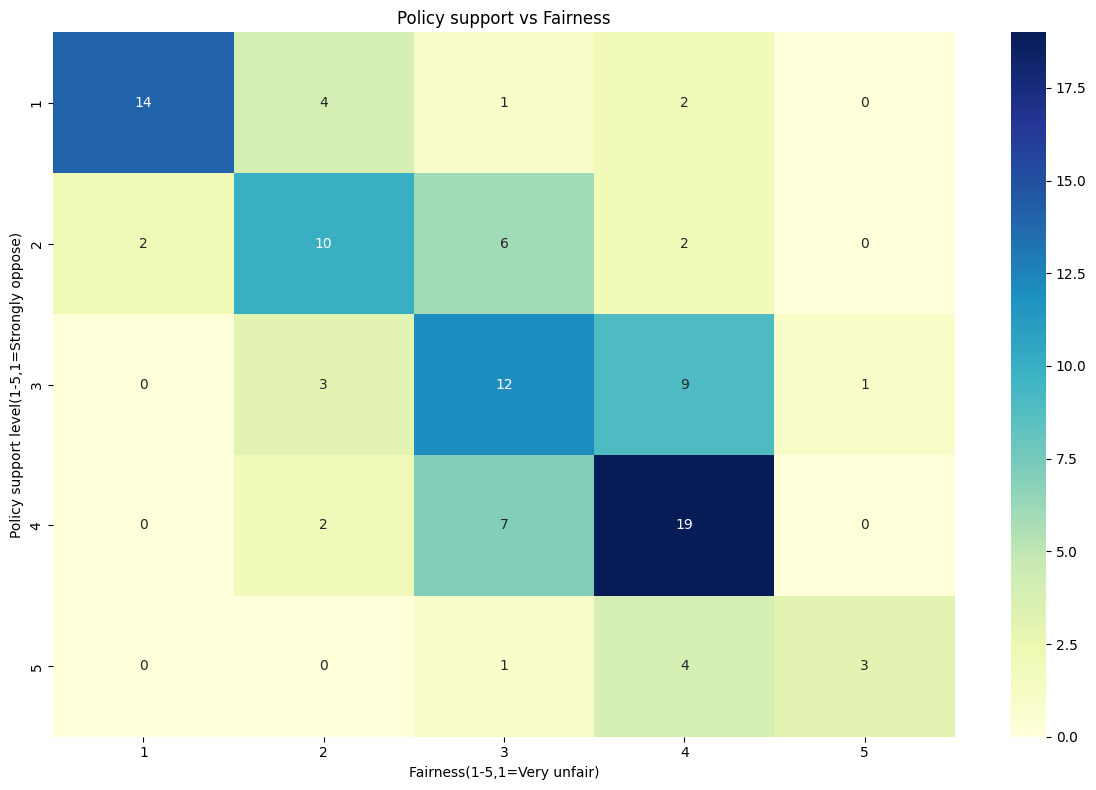

In [ ]:
# 交叉表分析
cross_tab = pd.crosstab(df['support_info'], df['fairness'])
print(cross_tab)

# 可视化
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Policy support vs Fairness')
plt.xlabel('Fairness(1-5,1=Very unfair)')
plt.ylabel('Policy support level(1-5,1=Strongly oppose)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# 政府考虑充分性 (1-5量表)
consideration_mapping = {
    '完全未考慮/ Not considered at all': 1,
    '較少考慮 / Considered less': 2,
    '一般 /  Average': 3,
    '較充分考慮 /  Considered fairly fully': 4,
    '非常充分 / Considered very fully': 5
}
df['government_consideration'] = df['EffectivenessPerception'].map(consideration_mapping)

In [ ]:
# 政策帮助程度 (1-5量表)
helpfulness_mapping = {
    '完全沒幫助 / Not helpful at all': 1,
    '沒太多幫助 / Not very helpful': 2,
    '一般 / Average':3,
    '有一些幫助 / Somewhat helpful': 4,
    '非常有幫助 / Very helpful': 5

}
df['policy_helpfulness'] = df['RecyclingEffectPerception'].map(helpfulness_mapping)

In [ ]:
# 垃圾问题严重性 (1-5量表)
severity_mapping = {
    '完全不嚴重 / Not at all severe': 1,
    '不太嚴重 / Slightly severe': 2,
    '中等嚴重 / Moderately severe': 3,
    '非常嚴重 / Highly severe': 4
}
df['waste_severity'] = df['CurrentSeverity'].map(severity_mapping)

In [ ]:
# 每日垃圾袋数 (连续变量)
bag_mapping = {
    '少於1袋 / Less than 1 bag': 0.5,
    '正好1袋 / Exactly 1 bag': 1,
    '多於1袋 / More than 1 bag': 1.5  # 可根据实际调整
}
df['daily_bags'] = df['DailyWasteBags'].map(bag_mapping)

In [ ]:
# 回收频率 (每周次数)
recycle_freq_mapping = {
    '從未回收 / Never recycled': 0,
    '1-2次 / 1-2 times': 1.5,
    '3-4次 / 3-4 times': 3.5,
    '5次或以上 / 5 times or more': 5,
    '每天都會回收 / Recycled daily': 7
}
df['recycle_frequency'] = df['RecyclingFrequencyLastWeek'].map(recycle_freq_mapping)

In [ ]:
# 回收耗时程度 (1-3量表)
effort_mapping = {
    '從未回收 /Never recycled': 0,
    '少量時間（簡單分類，無需清潔）/Slight effort (basic sorting, no cleaning)': 1,
    '中等時間（分類 + 簡單清潔）/Moderate effort (sorting + light cleaning)': 2,
    '較多時間（徹底分類 + 仔細清潔 + 專門投遞）/Significant effort (thorough sorting + cleaning + dedicated delivery)': 3
}
df['recycling_effort'] = df['RecyclingEffort'].map(effort_mapping)


food_waste_behavior
never_seen       0.460784
seen_and_used    0.274510
seen_not_used    0.264706
Name: proportion, dtype: float64

Coverage rate of kitchen waste bins: 53.9%
The usage rate among the covered population: 50.9%
Theoretical total utilization rate: 27.5%



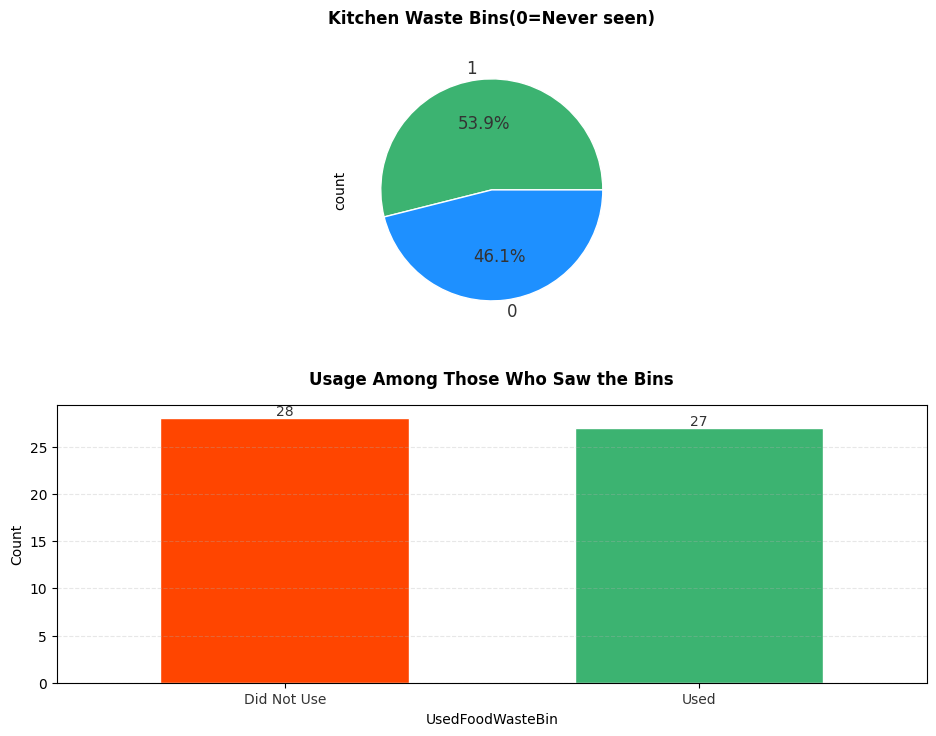

In [ ]:
# 厨余桶使用 (布尔变量)
df['SeenFoodWasteBin'] = df['SeenFoodWasteBin'].map({'是 / Yes': 1, '否 / No': 0})
df['UsedFoodWasteBin'] = df['UsedFoodWasteBin'].map({'是 / Yes': 1, '否 / No': 0})
# 创建三重状态变量
df['food_waste_behavior'] = np.where(
    df['SeenFoodWasteBin'] == 0,  # 未见过
    'never_seen',
    np.where(
        df['UsedFoodWasteBin'] == 1,  # 见过且使用过
        'seen_and_used',
        'seen_not_used'  # 见过但未使用
    )
)

# 验证分布
print(df['food_waste_behavior'].value_counts(normalize=True))

# 1. 全样本分析见过率
seen_rate = df['SeenFoodWasteBin'].mean()

# 2. 在见过子样本中分析使用率
usage_rate = df[df['SeenFoodWasteBin']==1]['UsedFoodWasteBin'].mean()

# 3. 计算调整后的总体使用率
adjusted_usage_rate = seen_rate * usage_rate

print(f"""
Coverage rate of kitchen waste bins: {seen_rate:.1%}
The usage rate among the covered population: {usage_rate:.1%}
Theoretical total utilization rate: {adjusted_usage_rate:.1%}
""")

# 设置环保主题颜色
colors = {
    'used': '#3CB371',
    'not_used': '#FF4500'
}

plt.figure(figsize=(10, 8))

# 1. 可见性饼图
plt.subplot(2, 1, 1)
df['SeenFoodWasteBin'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=[colors['used'], '#1E90FF'],  # 主色+浅色渐变
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    textprops={'color': '#333333', 'fontsize': 12}
)
plt.title('Kitchen Waste Bins(0=Never seen)',
          color='black',
          pad=20,
          fontdict={'weight': 'bold'})

# 2. 使用情况柱状图 (使用对比色)
plt.subplot(2, 1, 2)
ax = df[df['SeenFoodWasteBin']==1]['UsedFoodWasteBin'].value_counts().plot.bar(
    color=[colors['not_used'], colors['used']],  # 强调未使用行为
    edgecolor='white',
    width=0.6
)

# 美化柱状图
#  ax.set_facecolor('#F8F8F8')
plt.title('Usage Among Those Who Saw the Bins',
          color='black',
          pad=15,
          fontdict={'weight': 'bold'})
plt.xticks([0,1], ['Did Not Use', 'Used'],
           rotation=0,
           color='#333333')
plt.ylabel('Count', color='black')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# 添加数据标签
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points',
                color='#333333')

plt.tight_layout(pad=3.0)
plt.show()

  ExpectedEarliestSaturationLandfill  Q1_score
0                    不清楚/ don’t know         0
1                    不清楚/ don’t know         0
2                    不清楚/ don’t know         0
3          新界西/ New Territories West         0
4                    不清楚/ don’t know         0
  NonRecyclableItem  Q2_score
0      鏡子 / Mirrors         1
1      鏡子 / Mirrors         1
2      鏡子 / Mirrors         1
3      鏡子 / Mirrors         1
4      鏡子 / Mirrors         1
  EstimatedRecyclingRate2023  Q3_score
0                       <20%         0
1                     20-40%         1
2                       <20%         0
3                     20-40%         1
4                     20-40%         1
Accuracy rate of each question:
Q1_LandFill: 5.9%
Q2_RecyclableMaterial: 84.3%
Q3_Rcovery: 53.9%

Overall average accuracy rate:48.0%


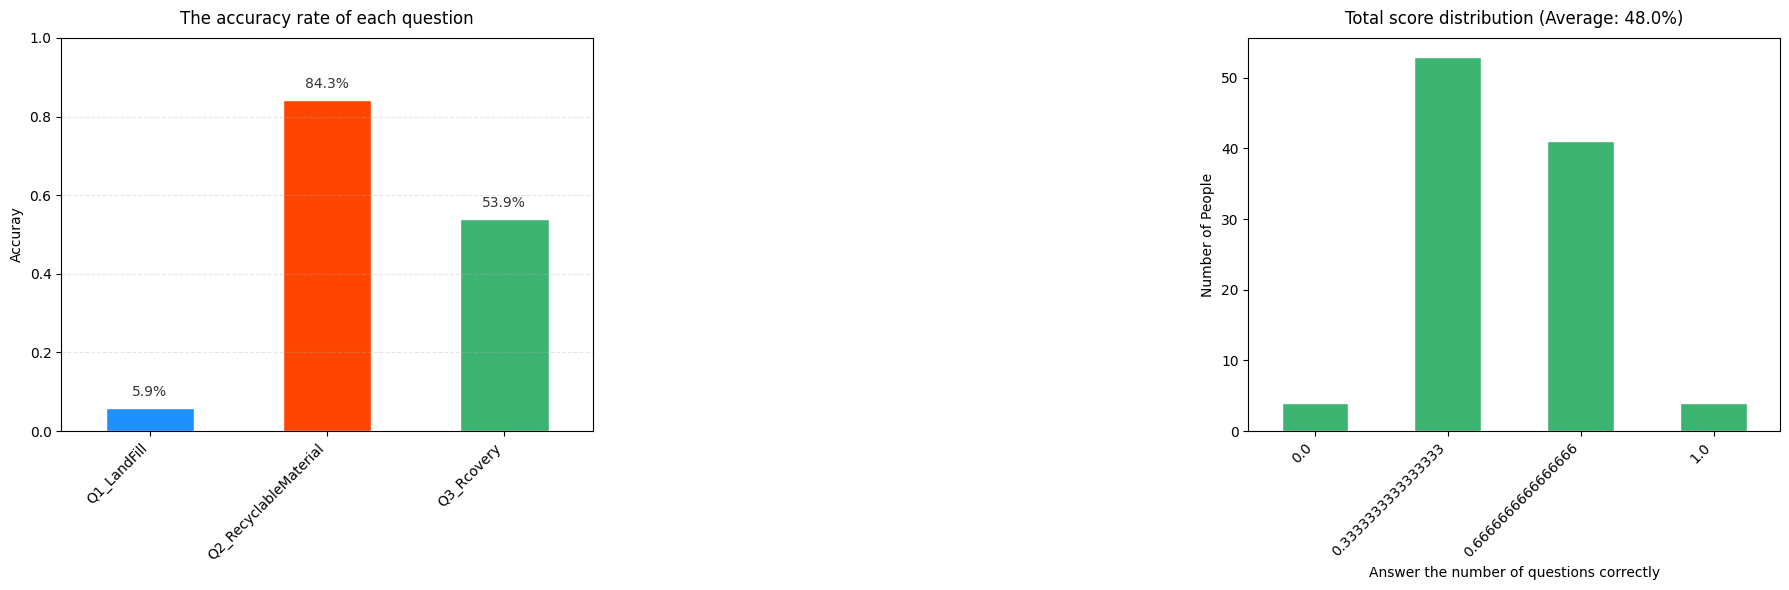

In [ ]:
# 1.1 第一题：填埋场知识（新界东南=1，其他=0）
df['Q1_score'] = np.where(
    df['ExpectedEarliestSaturationLandfill'].str.contains('新界東南/Southeast of the New Territories'),
    1, 0
)

# 1.2 第二题：可回收物品知识（镜子=1，其他=0）
df['Q2_score'] = np.where(
    df['NonRecyclableItem'].str.contains('鏡子 / Mirrors'),
    1, 0
)

# 1.3 第三题：回收率知识（20-40%=1，其他=0）
df['Q3_score'] = np.where(
    df['EstimatedRecyclingRate2023'].str.contains('20-40%'),
    1, 0
)

# 验证转换结果
print(df[['ExpectedEarliestSaturationLandfill', 'Q1_score']].head())
print(df[['NonRecyclableItem', 'Q2_score']].head())
print(df[['EstimatedRecyclingRate2023', 'Q3_score']].head())

# 2.1 各题正确率
correct_rates = {
    'Q1_LandFill': df['Q1_score'].mean(),
    'Q2_RecyclableMaterial': df['Q2_score'].mean(),
    'Q3_Rcovery': df['Q3_score'].mean()
}

# 2.2 总体正确率
total_score = df[['Q1_score', 'Q2_score', 'Q3_score']].mean(axis=1)
overall_rate = total_score.mean()

print("Accuracy rate of each question:")
for q, rate in correct_rates.items():
    print(f"{q}: {rate:.1%}")

print(f"\nOverall average accuracy rate:{overall_rate:.1%}")

# 设置环保主题颜色
colors = ['#1E90FF', '#FF4500', '#3CB371']  # 蓝、橙、绿

plt.figure(figsize=(18, 6))

# 3.1 各题正确率比较
plt.subplot(1, 3, 1)
pd.Series(correct_rates).plot.bar(color=colors, edgecolor='white')
plt.title('The accuracy rate of each question', pad=10, color='black', fontsize=12)
plt.ylim(0, 1)
plt.ylabel('Accuray')
plt.xticks(rotation=45, ha='right')  # 倾斜45度，右对齐保证标签可读性
plt.grid(axis='y', linestyle='--', alpha=0.3)

# 添加数据标签
for i, v in enumerate(correct_rates.values()):
    plt.text(i, v+0.03, f"{v:.1%}", ha='center', color='#333333')


# 3.3 总分分布
plt.subplot(1, 3, 3)
total_score.value_counts().sort_index().plot.bar(color='#3CB371', edgecolor='white')
plt.title(f'Total score distribution (Average: {overall_rate:.1%})', pad=10, color='black', fontsize=12)
plt.xlabel('Answer the number of questions correctly')
plt.ylabel('Number of People')
plt.xticks(rotation=45, ha='right')



plt.tight_layout()
plt.show()

In [ ]:
# 1.1 第一题：填埋场知识（新界东南=1，其他=0，不清楚=0.5）
df['Q1_score'] = np.where(
    df['ExpectedEarliestSaturationLandfill'].str.contains('新界東南/Southeast of the New Territories'),
    1,
    np.where(
        df['ExpectedEarliestSaturationLandfill'].str.contains('不清楚/ don’t know'),
        0.5,
        0
    )
)

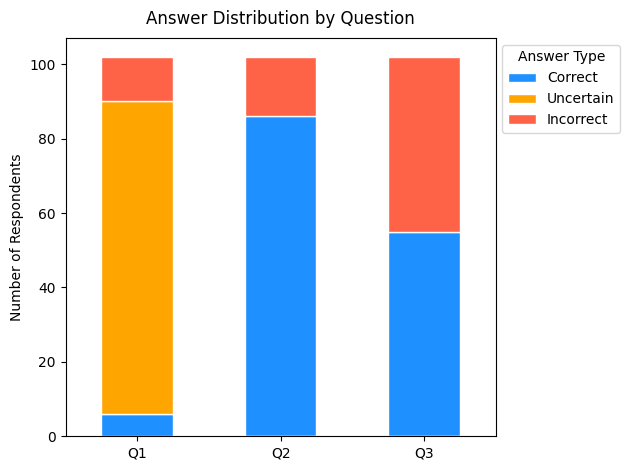

In [ ]:
# 3.2 答题分布（堆叠柱状图）
score_counts = pd.DataFrame({
    'Correct': [
        (df['Q1_score'] == 1).sum(),
        (df['Q2_score'] == 1).sum(),
        (df['Q3_score'] == 1).sum()
    ],
    'Uncertain': [
        (df['Q1_score'] == 0.5).sum(),
        (df['Q2_score'] == 0.5).sum(),
        (df['Q3_score'] == 0.5).sum()
    ],
    'Incorrect': [
        (df['Q1_score'] == 0).sum(),
        (df['Q2_score'] == 0).sum(),
        (df['Q3_score'] == 0).sum()
    ]
}, index=['Q1', 'Q2', 'Q3'])

score_counts.plot.bar(
    stacked=True,
    color=['#1E90FF', '#FFA500', '#FF6347'],
    edgecolor='white'
)

plt.title('Answer Distribution by Question', pad=10, color='black', fontsize=12)
plt.ylabel('Number of Respondents')
plt.xticks(rotation=0)  # 水平显示问题标签
plt.legend(title='Answer Type', bbox_to_anchor=(1, 1))
plt.tight_layout()  # 确保图例不被裁剪

In [ ]:
# 年龄区间 (取中值)
age_mapping = {
    '18-24歲 / 18-24': 21,
    '25-34歲 / 25-34': 30,
    '35-44歲 / 35-44': 40,
    '45-54歲 / 45-54': 50,
    '55-64歲 / 55-64': 60,
    '65歲及以上 / 65+': 70
}
df['age'] = df['AgeRange'].map(age_mapping)

In [ ]:
df["LocalResidentcode"] = df["IsPermanentResident"].map({"是 / Yes": 1, "否 / No": 0, "是": 1, "否": 0}).astype(float)

In [ ]:
#教育水平
edu_mapping = {
    "小學及以下 / Primary or below": 0,
    "中學 / Secondary": 1,
    "大專或本科 / Diploma or Bachelor’s": 2,
    "碩士及以上 / Master’s or above": 3
}
df["EducationLevel"] = df["HighestEducationLevel"].map(edu_mapping)


In [ ]:
# 家庭人数 (连续变量)
df['household_size'] = df['HouseholdSize'].replace('5 or above', 5).astype(int)

In [ ]:
# 收入 (取区间中值)
income_mapping = {
    "低於15,000港元 / Below HK$15,000":1,
    "15,001-30,000港元":2,
    "30,001-50,000港元":3,
    "50,001-70,000港元":4,
    "70,000港元以上 / Above HK$70,000":5
}

df["Income"] = df["HouseholdMonthlyIncomeRange"].map(income_mapping)


In [ ]:
# 房屋类型 (分类变量，建议独热编码)
housing_dummies = pd.get_dummies(df['HousingType'], prefix='housing').astype(int)
df = pd.concat([df, housing_dummies], axis=1)

In [ ]:
# 简化区域分类
district_group = {
    1: ['中西區 / Central & Western', '灣仔區 / Wan Chai', '東區 / Eastern', '南區 / Southern'],
    2: ['油尖旺區 / Yau Tsim Mong', '深水埗區 / Sham Shui Po', '九龍城區 / Kowloon City',
            '黃大仙區 / Wong Tai Sin', '觀塘區 / Kwun Tong'],
    3: ['葵青區 / Kwai Tsing', '荃灣區 / Tsuen Wan', '屯門區 / Tuen Mun', '元朗區 / Yuen Long',
            '北區 / North', '大埔區 / Tai Po', '沙田區 / Sha Tin', '西貢區 / Sai Kung']
}
def map_region(district):
    for region, districts in district_group.items():
        if district in districts:
            return region
    return 0
df['region'] = df['HongKongDistrict'].apply(map_region)

# 分别输出香港島、九龍、新界的数量
hong_kong_island_count = (df['region'] == 1).sum()
kowloon_count = (df['region'] == 2).sum()
new_territories_count = (df['region'] == 3).sum()
other_count = (df['region'] == 0).sum()

# 输出统计结果
print("香港島的数量：", hong_kong_island_count)
print("九龍的数量：", kowloon_count)
print("新界的数量：", new_territories_count)
print("其他区域的数量：", other_count)

香港島的数量： 12
九龍的数量： 49
新界的数量： 40
其他区域的数量： 1


## 保存处理后结果

In [ ]:
# 检查转换结果
print(df[['support_info','support_after_info', 'fairness', 'government_consideration','policy_helpfulness', 'recycle_frequency',
          'waste_severity', 'daily_bags', 'recycle_frequency','recycling_effort','food_waste_behavior','Q1_score','Q2_score', 'Q3_score','age', 'EducationLevel', 'household_size', 'Income', 'region']].describe())

# 保存处理后的数据
df.to_csv('processed_hk_waste_policy_survey.csv', index=False)

       support_info  support_after_info    fairness  government_consideration  \
count    102.000000          102.000000  102.000000                102.000000   
mean       2.823529            3.058824    2.931373                  2.460784   
std        1.261869            1.115361    1.154070                  1.077874   
min        1.000000            1.000000    1.000000                  1.000000   
25%        2.000000            2.000000    2.000000                  2.000000   
50%        3.000000            3.000000    3.000000                  2.500000   
75%        4.000000            4.000000    4.000000                  3.000000   
max        5.000000            5.000000    5.000000                  5.000000   

       policy_helpfulness  recycle_frequency  waste_severity  daily_bags  \
count          102.000000          102.00000      102.000000  102.000000   
mean             2.901961            2.45098        2.715686    0.975490   
std              1.353469            2.226

## 交叉分析

/tmp/ipython-input-30-202588827.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='household_size', y='support_info',
/tmp/ipython-input-30-202588827.py:3: UserWarning: 
The palette list has fewer values (4) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, x='household_size', y='support_info',


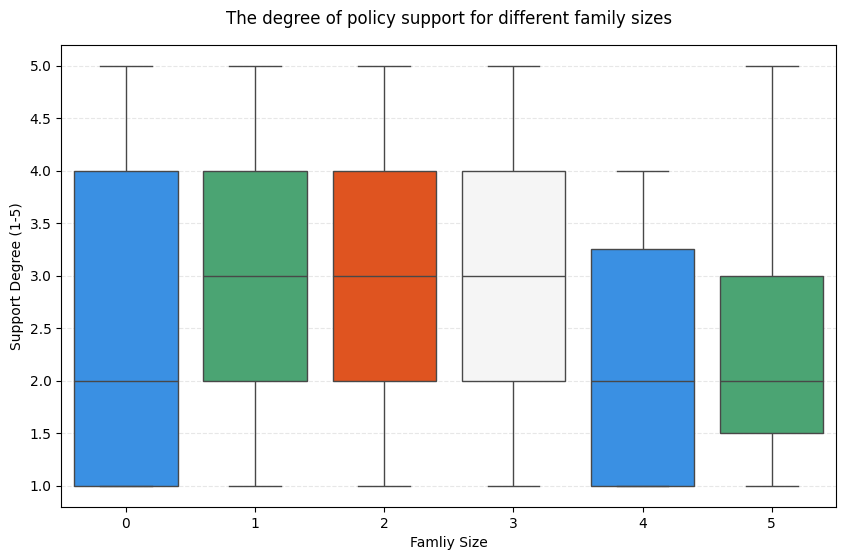

In [ ]:
#家庭人数vs支持度
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='household_size', y='support_info',
            palette=list(eco_colors.values())[:5])
plt.title('The degree of policy support for different family sizes', pad=15)
plt.xlabel('Famliy Size')
plt.ylabel('Support Degree (1-5)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


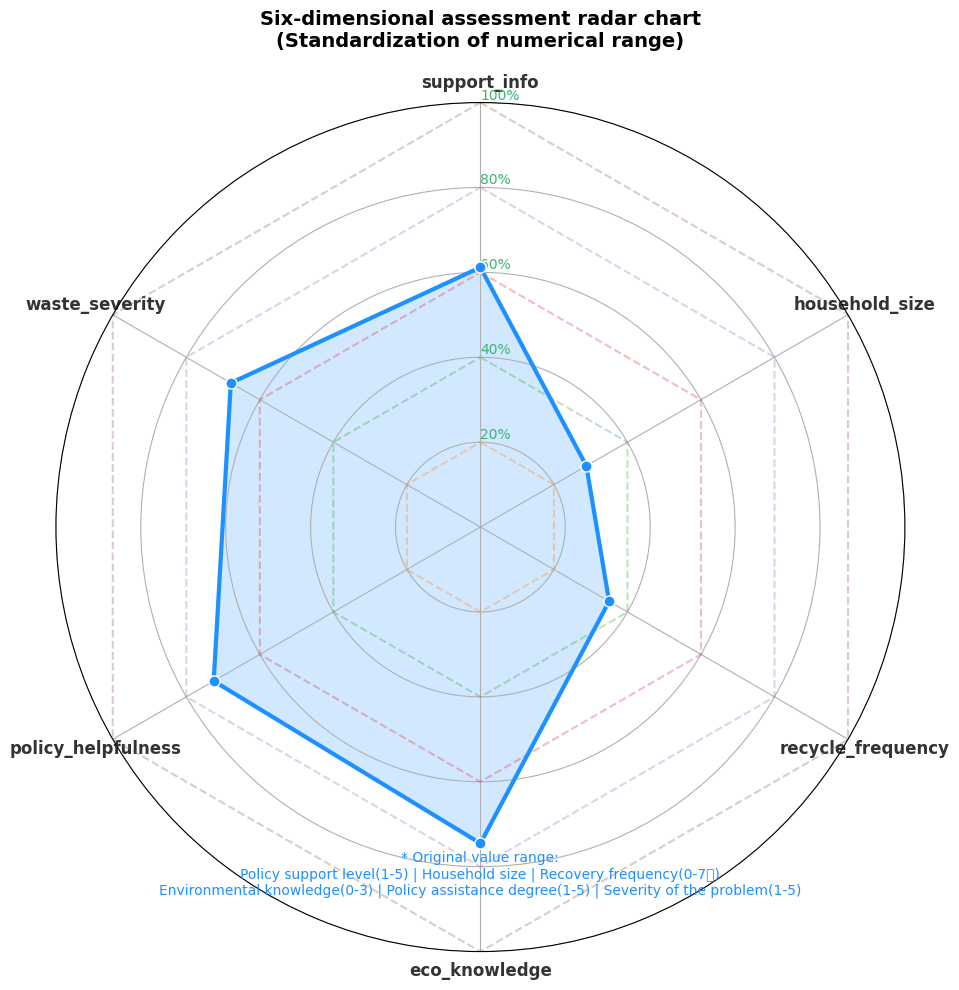

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 设置环保主题颜色
eco_colors = {
    'before': '#1E90FF',  # 原始支持度 - 蓝色
    'after': '#FF4500',   # 信息提供后 - 橙色
    'grid': '#3CB371'     # 网格线 - 绿色
}
# 计算环保知识总得分（0-3分）
df['eco_knowledge'] = df[['Q1_score', 'Q2_score', 'Q3_score']].sum(axis=1)



categories = ['support_info','household_size','recycle_frequency','eco_knowledge','policy_helpfulness','waste_severity']
max_values = [5, 5, 7, 3, 4, 4]  # 各指标最大值



# 原始支持度数据
values_before = [
    df['support_info'].mean(),
    df['eco_knowledge'].mean(),
    df['recycle_frequency'].mean(),
    df['household_size'].mean(),
    df['policy_helpfulness'].mean()

]

# 信息提供后支持度数据
values_after = [
    df['support_after_info'].mean(),
    df['eco_knowledge'].mean(),  # 知识不变
    df['recycle_frequency'].mean(),  # 行为不变
    df['household_size'].mean(),  # 家庭规模不变
    df['policy_helpfulness'].mean(),
    df['waste_severity'].mean()
]
# 标准化到0-100%范围
normalized = [v/max_val*100 for v, max_val in zip(values_before, max_values)]
normalized = [v/max_val*100 for v, max_val in zip(values_after, max_values)]


#设置环保主题颜色
eco_colors = {
    'main': '#1E90FF',    # 主色-蓝色
    'secondary': '#3CB371', # 辅色-绿色
    'highlight': '#FF4500'  # 强调色-橙色
}


plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# 角度计算 (关键步骤)
N = len(categories)
angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # 闭合图形
normalized += normalized[:1]  # 闭合数据

# 绘制网格线
for i in range(0, 101, 20):
    ax.plot(angles, [i]*len(angles),
            linestyle='--',
            alpha=0.3)

# 绘制数据线
ax.plot(angles, normalized,
        color=eco_colors['main'],
        linewidth=3,
        marker='o',
        markersize=8,
        markeredgecolor='white')

# 填充区域
ax.fill(angles, normalized,
        color=eco_colors['main'],
        alpha=0.2)

# 设置极坐标参数
ax.set_theta_offset(np.pi/2)  # 0度位置在顶部
ax.set_theta_direction(-1)    # 顺时针方向
ax.set_rlabel_position(0)     # 刻度标签位置
plt.ylim(0, 100)

# 设置标签
plt.xticks(angles[:-1], categories,
           color='#333333',
           size=12,
           fontweight='bold')

plt.yticks([20,40,60,80,100],
           ["20%","40%","60%","80%","100%"],
           color=eco_colors['secondary'],
           size=10)

# 添加数据标签
for i, (angle, val) in enumerate(zip(angles[:-1], values_before)):
    ax.annotate(f"{val:.1f}",
                xy=(angle, 105),
                ha='center',
                color=eco_colors['highlight'],
                fontweight='bold')

# 添加标题和图例
plt.title('Six-dimensional assessment radar chart\n(Standardization of numerical range)',

          pad=40,
          fontsize=14,
          fontweight='bold')

# 添加颜色条说明
plt.figtext(0.5, 0.1,
            "* Original value range:\n"
            "Policy support level(1-5) | Household size | Recovery frequency(0-7次)\n"
            "Environmental knowledge(0-3) | Policy assistance degree(1-5) | Severity of the problem(1-5)",
            ha='center',
            color=eco_colors['main'])

plt.tight_layout()
plt.show()

## 判断谁才是对政策支持率影响最大的

In [ ]:
from scipy.stats import chi2_contingency

# 提取分类变量列名
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

# 去除目标变量和指定变量
cols_to_drop = ['PolicySupportLevel', 'PolicySupportLevel2']
categorical_cols = categorical_cols.drop(cols_to_drop)

# 存储结果
chi2_results = []

# 遍历分类变量
for col in categorical_cols:
    # 构建列联表
    contingency_table = pd.crosstab(df['PolicySupportLevel'], df[col])

    # 进行卡方检验
    chi2, p, dof, ex = chi2_contingency(contingency_table)

    # 存储结果
    chi2_results.append({'Variable': col, 'Chi2': chi2, 'P-value': p})

# 转换为 DataFrame
chi2_results_df = pd.DataFrame(chi2_results)

# 筛选出 p 值小于 0.1 的显著相关变量
significant_results = chi2_results_df[chi2_results_df['P-value'] < 0.1]

# 按照卡方值降序排序，卡方值越大，影响越大
significant_results = significant_results.sort_values(by='Chi2', ascending=False)

print('与 PolicySupportLevel 显著相关的变量及影响程度（按卡方值降序排列）：')
significant_results

与 PolicySupportLevel 显著相关的变量及影响程度（按卡方值降序排列）：


,Variable,Chi2,P-value
1,FairnessPerception,110.420385,3.731250e-16
2,EffectivenessPerception,86.606997,1.049954e-11
3,RecyclingEffectPerception,44.528688,1.240758e-05
16,AgeRange,30.000645,6.984321e-02
9,NonRecyclableItem,25.653088,1.201391e-02
12,HighestEducationLevel,21.001531,5.035804e-02
4,CurrentSeverity,18.741558,9.495922e-02


/tmp/ipython-input-33-1217425470.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(significant_results, x='Chi2', y='Variable', inner='stick', palette='Dark2')


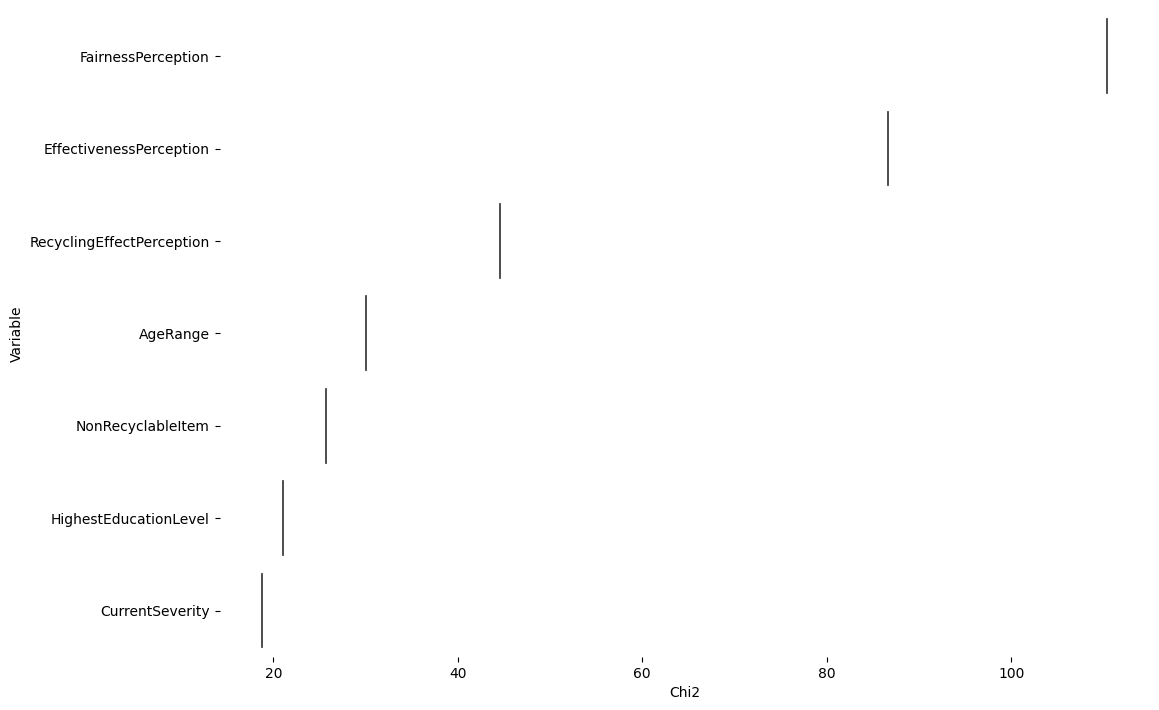

In [ ]:
# @title Variable vs Chi2

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(significant_results['Variable'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(significant_results, x='Chi2', y='Variable', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import MNLogit  # 多分类逻辑回归

# 加载数据（假设数据文件路径正确，需替换为实际路径）
data = pd.read_csv('/content/processed_hk_waste_policy_survey.csv')


# 筛选显著相关分类变量（根据之前卡方检验结果，这里示例选几个，可按需调整）
cols = ['FairnessPerception', 'EffectivenessPerception',
        'RecyclingEffectPerception','AgeRange', 'NonRecyclableItem','HighestEducationLevel','CurrentSeverity', 'PolicySupportLevel']
sub_data = data[cols].dropna()

# 对分类变量编码（因变量PolicySupportLevel也需编码，这里按顺序编码）
encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(sub_data)
encoded_df = pd.DataFrame(encoded_data, columns=sub_data.columns)

# 构建逻辑回归模型
X = encoded_df.drop('PolicySupportLevel', axis=1)
y = encoded_df['PolicySupportLevel']
X = sm.add_constant(X)  # 添加截距项
# 使用 MNLogit 进行多分类逻辑回归
model = MNLogit(y, X)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 1.170919
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:     PolicySupportLevel   No. Observations:                  102
Model:                        MNLogit   Df Residuals:                       70
Method:                           MLE   Df Model:                           28
Date:                Tue, 01 Jul 2025   Pseudo R-squ.:                  0.2416
Time:                        03:28:24   Log-Likelihood:                -119.43
converged:                       True   LL-Null:                       -157.49
Covariance Type:            nonrobust   LLR p-value:                 2.498e-06
     PolicySupportLevel=1       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.5907      2.202     -0.268      0.788      -4.

In [ ]:
# 输出回归方程
variables = result.params.index.tolist()
coefficients = result.params.values

equation = "PolicySupportLevel = "
for var, coef in zip(variables, coefficients):
    equation += f"{coef:.3f}·{var} + "

print("回归方程:\n", equation.rstrip(" + "))

TypeError: unsupported format string passed to numpy.ndarray.__format__

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import MNLogit  # 多分类逻辑回归

# 加载数据（假设数据文件路径正确，需替换为实际路径）
data = pd.read_csv('/content/processed_hk_waste_policy_survey.csv')


# 筛选显著相关分类变量（根据之前卡方检验结果，这里示例选几个，可按需调整）
cols = ['FairnessPerception', 'EffectivenessPerception',
        'RecyclingEffectPerception','AgeRange', 'NonRecyclableItem','HighestEducationLevel','CurrentSeverity', 'PolicySupportLevel2']
sub_data = data[cols].dropna()

# 对分类变量编码（因变量PolicySupportLevel也需编码，这里按顺序编码）
encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(sub_data)
encoded_df = pd.DataFrame(encoded_data, columns=sub_data.columns)

# 构建逻辑回归模型
X = encoded_df.drop('PolicySupportLevel2', axis=1)
y = encoded_df['PolicySupportLevel2']
X = sm.add_constant(X)  # 添加截距项
# 使用 MNLogit 进行多分类逻辑回归
model = MNLogit(y, X)
result = model.fit()

print(result.summary())

In [ ]:
# 检查列名
print(X.columns.tolist())

In [ ]:
# 假设 result 是 StatsModels 的回归结果对象
intercept = result.params['const']
fairness_coef = result.params['FairnessPerception']
effectiveness_coef = result.params['EffectivenessPerception']
recyclingEffectPerception_coef = result.params['RecyclingEffectPerception']
agerange_coef = result.params['AgeRange']
nonrecyclableitem_coef = result.params['NonRecyclableItem']
highesteducationlevel_coef = result.params['HighestEducationLevel']
currentseverity_coef = result.params['CurrentSeverity']

print(f"PolicySupportLevel = {intercept:.2f} + {fairness_coef:.2f}·FairnessPerception + {effectiveness_coef:.2f}·EffectivenessPerception +{recyclingEffectPerception_coef:.2f}·RecyclingEffectPerception +{agerange_coef:.2f}·AgeRange+{nonrecyclableitem_coef:.2f}·NonRecyclableItem +{highesteducationlevel_coef:.2f}·HighestEducationLevel +{currentseverity_coef:.2f}·CurrentSeverity  ")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 多项逻辑回归
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logreg.fit(X, y)

# 预测
y_pred = logreg.predict(X)

# 评估模型
print(classification_report(y, y_pred))

# 查看系数
print("Coefficients:", logreg.coef_)
print("Intercept:", logreg.intercept_)

## t-test

In [ ]:
from scipy.stats import  ttest_rel
# 计算差值
d = support_level_counts - support_level2_counts

# 进行配对 t 检验
t_statistic, p_value = ttest_rel(support_level2_counts, support_level_counts)

print("t 值：", t_statistic)
print("p 值：", p_value)
if p_value < 0.1:
    print("拒绝原假设，阅读信息后政策支持水平有显著提高。")
else:
    print("不能拒绝原假设，阅读信息后政策支持水平没有显著变化。")